# A simple feed forward model - testing on unseen data

```




```
#### contents
- [Read data](#Read-data)
- [Prepare data](#Prepare-data)
- [Evaluate model](#Evaluate-model)

In [1]:
import os
import sys
import json
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import load_model

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
MODULES_PATH = '../modules'
MODELS_PATH = '../models'
DATA_PATH = '../data'

sys.path.append(MODULES_PATH)
from data import prepare_test_data

In [3]:
GPU = False

In [4]:
import tensorflow as tf
from keras import backend as K

num_cores = 4

if GPU:
    num_GPU = 1
    num_CPU = 1
else:
    num_CPU = 1
    num_GPU = 0

config = tf.ConfigProto(intra_op_parallelism_threads=num_cores,
                        inter_op_parallelism_threads=num_cores, 
                        allow_soft_placement=True,
                        device_count = {'CPU' : num_CPU,
                                        'GPU' : num_GPU}
                       )

session = tf.Session(config=config)
K.set_session(session)

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18355894950697354985
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4951913267
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12446581531920499444
physical_device_desc: "device: 0, name: GeForce GTX 1060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


## Read data

- [contents](#contents)

In [6]:
with open(os.path.join(DATA_PATH, 'test_data.pickle'),'rb') as datafile:
        corpora_test, labels_test = pickle.load(datafile)

## Prepare data

- [contents](#contents)

In [7]:
with open(os.path.join(DATA_PATH, 'pipeline_instance.pickle'),'rb') as datafile:
        pipeline_instance = pickle.load(datafile)

In [8]:
X_test, y_test = prepare_test_data(corpora_test, labels_test, pipeline_instance)

## Evaluate model

- [contents](#contents)

In [9]:
model = load_model(os.path.join(MODELS_PATH,'simple_ffn_model.h5'))

In [10]:
score, accuracy = model.evaluate(X_test, y_test)

10139/10139 [==============================] - 4s 421us/step


In [11]:
print('Model test accuracy {}%'.format(100*accuracy.round(4)))

Model test accuracy 92.41%


- confusion matrix

In [19]:
y_pred = model.predict(X_test)

In [29]:
trues = y_test.apply(lambda x: x.argmax(), axis=1)
preds = y_test.columns[y_pred.argmax(axis=1)]

cm = confusion_matrix(trues, preds)

C:\Users\themb\.conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


In [63]:
language_key = {
    'af': 'Afrikaans',
    'en': 'English',
    'nr': 'isiNdebele',
    'xh': 'isiXhosa',
    'zu': 'isiZulu', 
    'nso':'sePedi',
    'st': 'seSotho',
    'tn': 'seTswana',
    'ss': 'siSwati',
    've': 'tshiVenda',
    'ts': 'xiTsonga'}

In [67]:
cm_df = pd.DataFrame(cm, 
                     columns=[language_key[i] for i in y_test.columns], 
                     index=[language_key[i] for i in y_test.columns])
cm_df = cm_df.apply(lambda x: (100*(x/x.sum())).round(2), axis=1)

The confusion matrix mostly confirms our knowledge of the languages, with english and afrikaans performing well on their own, isiZulu, isiXhosa and isiNdebele slighly confusing each other and seTswana and sePedi heavily confusin each other was well. What comes as a surprise is that tshiVenda, isiXhosa, isiZulu and even English also experience some confusion with sePedi. Ironically sePedi achieves the third highest accuracy score while xiTsonga, and seSotho achieve the highest and second highest respecitvely. SeTwana is the worst performing langug loosing most of its performance to sePedi.

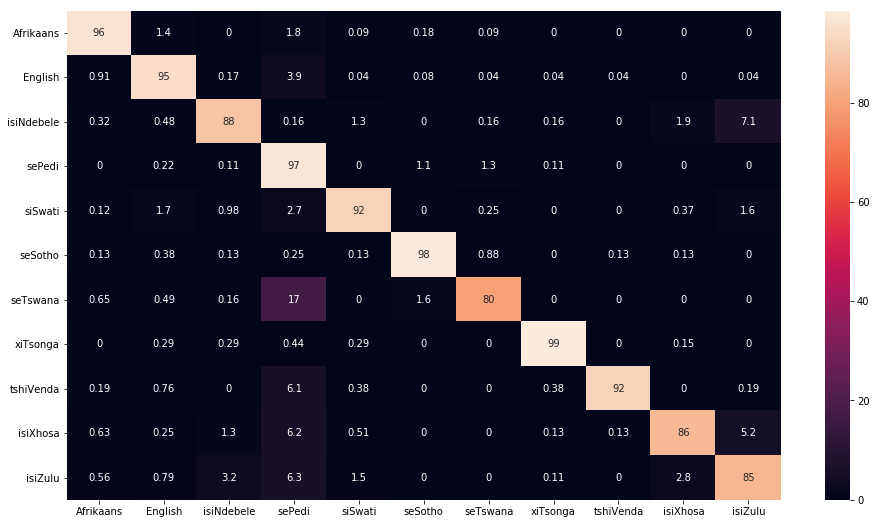

In [68]:
plt.figure(figsize = (16,9))
sns.heatmap(cm_df, annot=True)

## Final note

- [contents](#contents)